In [1]:
import dimod
from itertools import product
import json
import random 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm_notebook as tqdm
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import img_as_bool
import cv2 as cv
import random
import pandas as pd
# import MSQRBM
# import classicalRBM

In [2]:
image_height = 128
image_width = 128
len_x = image_height * image_width
len_y = 0
labels = [0, 2, 3, 4, 7, 20] #It's okay to use a limiter (filter) as showcase but we have 25 labels (Architectural styles)
THRESHOLD = 100
n_hidden = 80
qpu = False
epochs = 5000 
lr = 0.01

In [3]:
dataset = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
X_train = dataset.values[:,1:] #Converting without labels
X_train2 = dataset.values[:,:]
X_test = test.values[:,1:] #Converting without labels
X_test2 = test.values[:,:]

In [6]:
X_train3 = []
X_test3 = []

In [7]:
for label in labels:
    X_train3.append(dataset.values[np.where(dataset.values[:,0] == label), 1:][0])
    X_test3.append(test.values[np.where(test.values[:,0] == label), 1:][0])

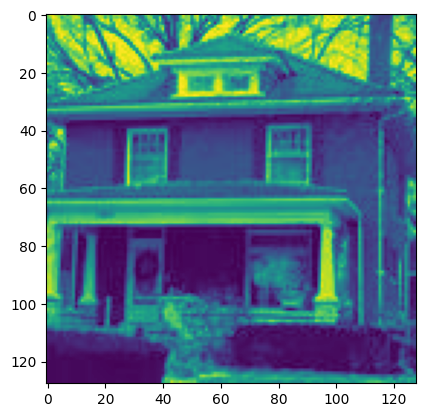

In [8]:
imgs = []
imgs_test = []
for label_index in range(len(labels)):
    imgs.append(np.resize(X_train3[label_index], (len(X_train3[label_index]), 128, 128)) / 255)
    imgs_test.append(np.resize(X_test3[label_index], (len(X_test3[label_index]), 128, 128)) / 255)
    
plt.imshow(imgs[0][0])
plt.show()

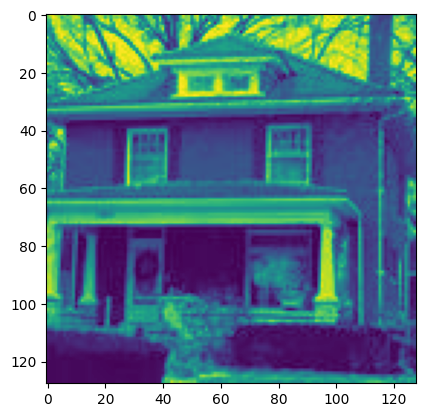

In [9]:
images_resized = []
images_resized_test = []
for digit_index in range(len(labels)):
    images_resized.append([resize(img, (image_width, image_height), anti_aliasing=True) for img in imgs[digit_index]])
    images_resized_test.append([resize(img, (image_width, image_height), anti_aliasing=True) for img in imgs_test[digit_index]])

plt.imshow(images_resized[0][0])
plt.show()

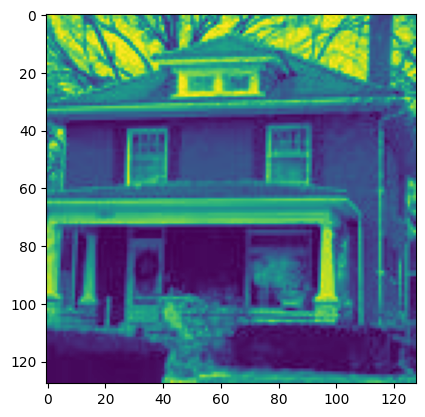

In [10]:
images_normalized = []
images_normalized_test = []

for label_index in range(len(labels)):
    images_normalized.append([cv.normalize(image_resized, image_resized, 0, 255, cv.NORM_MINMAX) for image_resized in images_resized[label_index]])
    images_normalized_test.append([cv.normalize(image_resized, image_resized, 0, 255, cv.NORM_MINMAX) for image_resized in images_resized_test[label_index]])

plt.imshow(images_normalized[0][0])
plt.show()

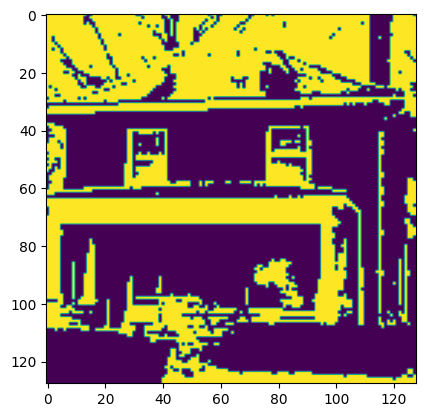

In [11]:
# converting to binary
data = []
data_test = []
for label_index in range(len(labels)):
    data.append([np.where(image_resized > THRESHOLD, 1, 0) for image_resized in images_resized[label_index]])
    data_test.append([np.where(image_resized > THRESHOLD, 1, 0) for image_resized in images_resized_test[label_index]])

plt.imshow(data[0][0])
plt.show()

In [12]:
input_data = []
input_data_test = []
for label_index in range(len(labels)):
    input_data.append([x.flatten().tolist() for x in data[label_index]])
    input_data_test.append([x.flatten().tolist() for x in data_test[label_index]])
    

In [13]:
result_picture_tab = []
for label_index in range(len(labels)):
    result_picture_tab.append(np.mean(input_data_test[label_index], axis = 0))

In [14]:
for label in labels:
    flat_input_data = [item for sublist in input_data for item in sublist]
    flat_input_data_test = [item for sublist in input_data_test for item in sublist]

random.shuffle(flat_input_data)
random.shuffle(flat_input_data_test)

In [ ]:
bm = classicalRBM.classicalRBM(n_visible=len_x, n_hidden=n_hidden, use_tqdm=True);
bm.image_height = image_height
bm.tqdm = tqdm
bm.result_picture_tab = result_picture_tab

In [ ]:
bm.train(flat_input_data, len_x, len_y, epochs = epochs, lr = lr, lr_decay = 0.01)

In [ ]:
bm = MSQRBM.MSQRBM(n_visible=len_x, n_hidden=n_hidden, qpu=qpu)
bm.image_height = image_height
bm.tqdm = tqdm
bm.result_picture_tab = result_picture_tab

In [ ]:
#bm.train(flat_input_data, len_x, len_y, epochs = epochs, lr = lr, lr_decay = 0.1)
bm.train(flat_input_data, len_x, len_y, epochs = 20, lr = lr, lr_decay = 0.1)